## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Bonus plots

In [2]:
def sin_decay(
    t: float | np.ndarray | list,
    omega: float = 1.0, 
    phi: float = 0.0, 
    tau: float = 1.0
) -> np.ndarray | float:
    if isinstance(t, list):
        t = np.array(t)
    return np.sin(omega * np.array(t) + phi) * np.exp(-t / tau)

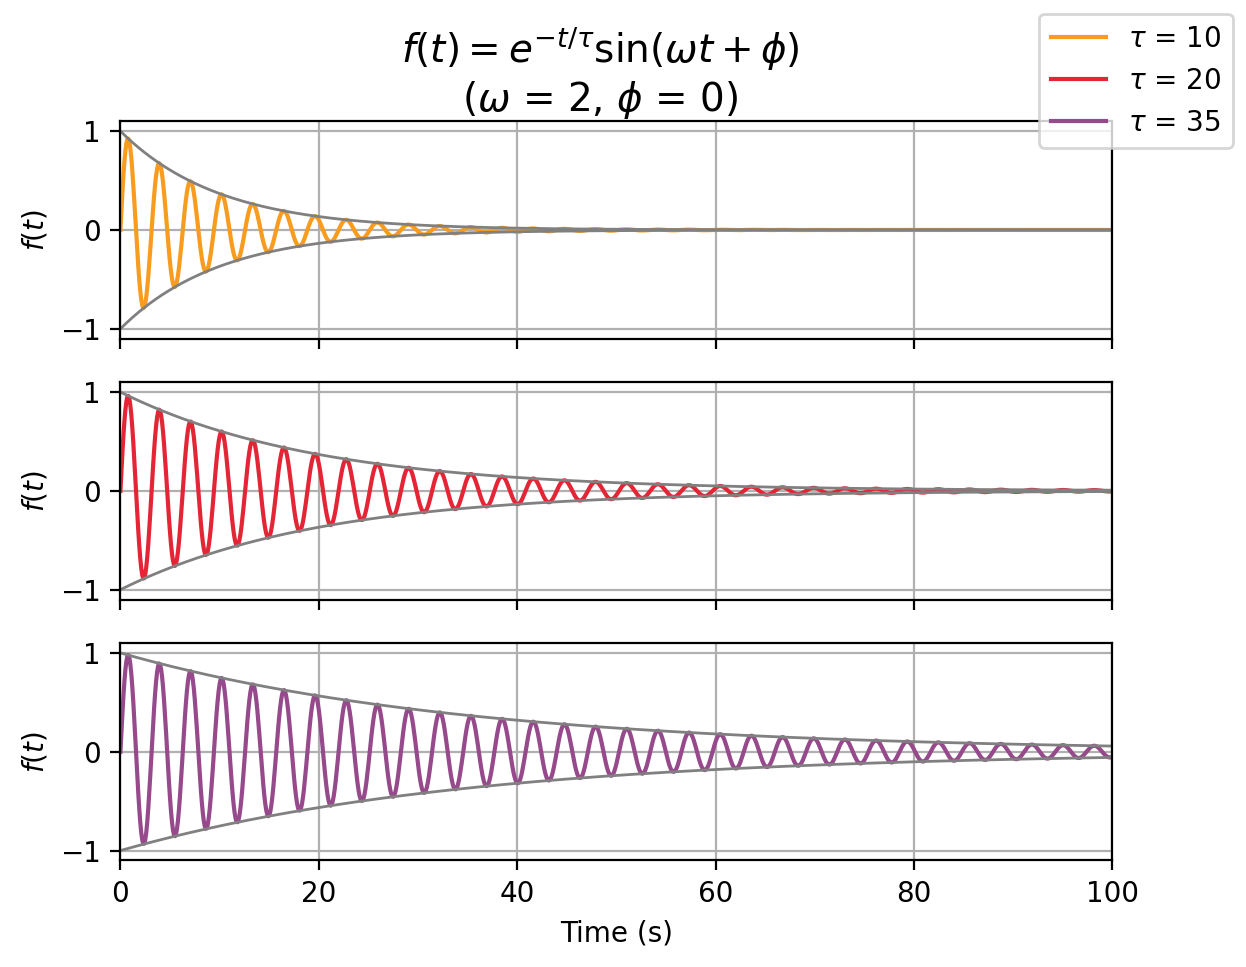

In [3]:
ts = np.arange(0, 100, 0.1)
taus = [10, 20, 35]
phi = 0
omega = 2
colors = ["#f89c20", "#e42536", "#964a8b"] # Source: https://github.com/mpetroff/accessible-color-cycles#final-results

fig, axs = plt.subplots(len(taus), 1, dpi=200)
for i, tau in enumerate(taus):
    ax = axs[i]
    
    # actual plot
    ax.plot(
        ts, 
        sin_decay(ts, tau=tau, phi=phi, omega=omega), 
        label = f"$\\tau$ = {tau}",
        color=colors[i]
    )
    
    # extra
    ax.plot(ts, np.exp(-ts / tau), color="gray", lw=1)
    ax.plot(ts, -np.exp(-ts / tau), color="gray", lw=1)
    
    ax.set_ylim(-1.1,1.1)
    ax.set_xlim(0, 100)
    ax.set_ylabel("$f(t)$")
    ax.grid()
    if i < len(taus) - 1:
        ax.tick_params("x", labelbottom=False)
    else:
        ax.set_xlabel("Time (s)")
fig.suptitle("$f(t) =  e^{-t/\\tau} \\sin(\\omega t + \\phi)$\n" + f"($\\omega$ = {omega}, $\\phi$ = {phi})", fontsize=14)
fig.legend()
        
plt.savefig("sine_decay.pdf", format="pdf")  
plt.show()